In [2]:
!pip install tensorflow

  Using cached tensorflow-2.7.0-cp38-cp38-manylinux2010_x86_64.whl (489.6 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached wrapt-1.13.3-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (84 kB)
  Using cached tensorflow_estimator-2.7.0-py2.py3-none-any.whl (463 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached grpcio-1.42.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.0 MB)
  Using cached flatbuffers-2.0-py2.py3-none-any.whl (26 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
  Using cached keras-2.7.0-py2.py3-none-any.whl (1.3 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorboard-2.7.0-py3-none-any.whl (5.8 MB)
  Using cached libclang-12.0.0-py2.py3-none-m

In [3]:
# General imports
import os
import gzip
import numpy as np
import matplotlib.pyplot as plt
from pylab import cm
import warnings
import tensorflow as tf

warnings.filterwarnings("ignore")

# scikit-learn imports
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Qiskit imports
from qiskit import IBMQ
from qiskit import Aer, execute
from qiskit.circuit import QuantumCircuit, Parameter, ParameterVector
from qiskit.circuit.library import PauliFeatureMap, ZFeatureMap, ZZFeatureMap
from qiskit.circuit.library import TwoLocal, NLocal, RealAmplitudes, EfficientSU2
from qiskit.circuit.library import HGate, RXGate, RYGate, RZGate, CXGate, CRXGate, CRZGate
from qiskit_machine_learning.kernels import QuantumKernel

2021-11-23 13:34:26.905332: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-23 13:34:26.905368: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


sd 47040000
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
ed 39200
(40, 784)
(10, 784)
(10, 784)


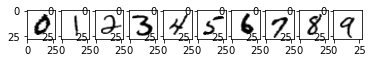

In [4]:
# Load MNIST dataset

from tensorflow.keras.datasets import mnist

(sample_train, labels_train), (sample_test, labels_test) = mnist.load_data()

print('sd',sample_train.size)
sample_train = sample_train[:50]
labels_train = labels_train[:50]
sample_test = sample_test[:10]
labels_test = labels_test[:10]
print(sample_train)

print('ed',sample_train.size)
# Split train data
sample_train, sample_val, labels_train, labels_val = train_test_split(
    sample_train, labels_train, test_size=0.2, random_state=42)
#sample_train, sample_val, sample_test reshaping
sample_train = sample_train.reshape(40,784)
sample_val = sample_val.reshape(10,784)
sample_test = sample_test.reshape(10,784)
print(sample_train.shape)
print(sample_val.shape)
print(sample_test.shape)

# Visualize samples
fig = plt.figure()

LABELS = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
num_labels = len(LABELS)
for i in range(num_labels):
    ax = fig.add_subplot(1, num_labels, i+1)
    img = sample_train[labels_train==LABELS[i]][0].reshape((28, 28))
    ax.imshow(img, cmap="Greys")
  

In [5]:
# Standardize
standard_scaler = StandardScaler()
sample_train = standard_scaler.fit_transform(sample_train)
sample_val = standard_scaler.transform(sample_val)
sample_test = standard_scaler.transform(sample_test)

# Reduce dimensions
N_DIM = 5
pca = PCA(n_components=N_DIM)
sample_train = pca.fit_transform(sample_train)
sample_val = pca.transform(sample_val)
sample_test = pca.transform(sample_test)

# Normalize
min_max_scaler = MinMaxScaler((-1, 1))
sample_train = min_max_scaler.fit_transform(sample_train)
sample_val = min_max_scaler.transform(sample_val)
sample_test = min_max_scaler.transform(sample_test)

In [ ]:
LABELS = [9, 8, 7, 6 ,5 ,4 ,3 ,2, 1, 0]
list = []
num_labels = len(LABELS)
for i in range(num_labels):

    labels_train_u = np.where(labels_train==LABELS[i], 1, 0)
    labels_val_u = np.where(labels_val==LABELS[i], 1, 0)
    print(f'Original validation labels:      {labels_val}')
    print(f'Validation labels for 0 vs Rest: {labels_val_u}')
    
    ZZfeat_map = ZZFeatureMap(feature_dimension=N_DIM, reps=3, entanglement='circular')
    kernel = QuantumKernel(feature_map=ZZfeat_map, quantum_instance=Aer.get_backend('qasm_simulator'))
   
    svc = SVC(kernel='precomputed', probability=True)

    matrix_train = kernel.evaluate(x_vec=sample_train)
    svc.fit(matrix_train, labels_train_u)
    
    matrix_val = kernel.evaluate(x_vec=sample_val, y_vec=sample_train)
    zzfeat_score = svc.score(matrix_val, labels_val_u)
    print(f'Accuracy of discriminating between label and others: {zzfeat_score*100}%')
    
    matrix_test = kernel.evaluate(x_vec=sample_test, y_vec=sample_train)
    pred = svc.predict_proba(matrix_test)[:, 1]
    print(f'Probability of label: {np.round(pred, 2)}')
    
    list.append(pred)
    
#print(list)    

Original validation labels:      [6 6 3 9 8 9 4 2 6 9]
Validation labels for 0 vs Rest: [0 0 0 1 0 1 0 0 0 1]
Accuracy of discriminating between label and others: 70.0%
Probability of label: [0.12 0.22 0.1  0.11 0.09 0.09 0.17 0.16 0.09 0.14]
Original validation labels:      [6 6 3 9 8 9 4 2 6 9]
Validation labels for 0 vs Rest: [0 0 0 0 1 0 0 0 0 0]
Accuracy of discriminating between label and others: 90.0%
Probability of label: [0.07 0.06 0.07 0.1  0.07 0.09 0.09 0.09 0.11 0.1 ]
Original validation labels:      [6 6 3 9 8 9 4 2 6 9]
Validation labels for 0 vs Rest: [0 0 0 0 0 0 0 0 0 0]
Accuracy of discriminating between label and others: 100.0%
Probability of label: [0.03 0.16 0.07 0.08 0.08 0.14 0.11 0.13 0.08 0.1 ]
Original validation labels:      [6 6 3 9 8 9 4 2 6 9]
Validation labels for 0 vs Rest: [1 1 0 0 0 0 0 0 1 0]
Accuracy of discriminating between label and others: 70.0%
Probability of label: [0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06]
Original validation labels:

In [6]:
ZZfeat_map = ZZFeatureMap(feature_dimension=N_DIM, reps=3, entanglement='circular')
kernel = QuantumKernel(feature_map=ZZfeat_map, quantum_instance=Aer.get_backend('qasm_simulator'))

/opt/conda/lib/python3.8/site-packages/sympy/core/expr.py:3949: SymPyDeprecationWarning: 

expr_free_symbols method has been deprecated since SymPy 1.9. See
https://github.com/sympy/sympy/issues/21494 for more info.

  SymPyDeprecationWarning(feature="expr_free_symbols method",


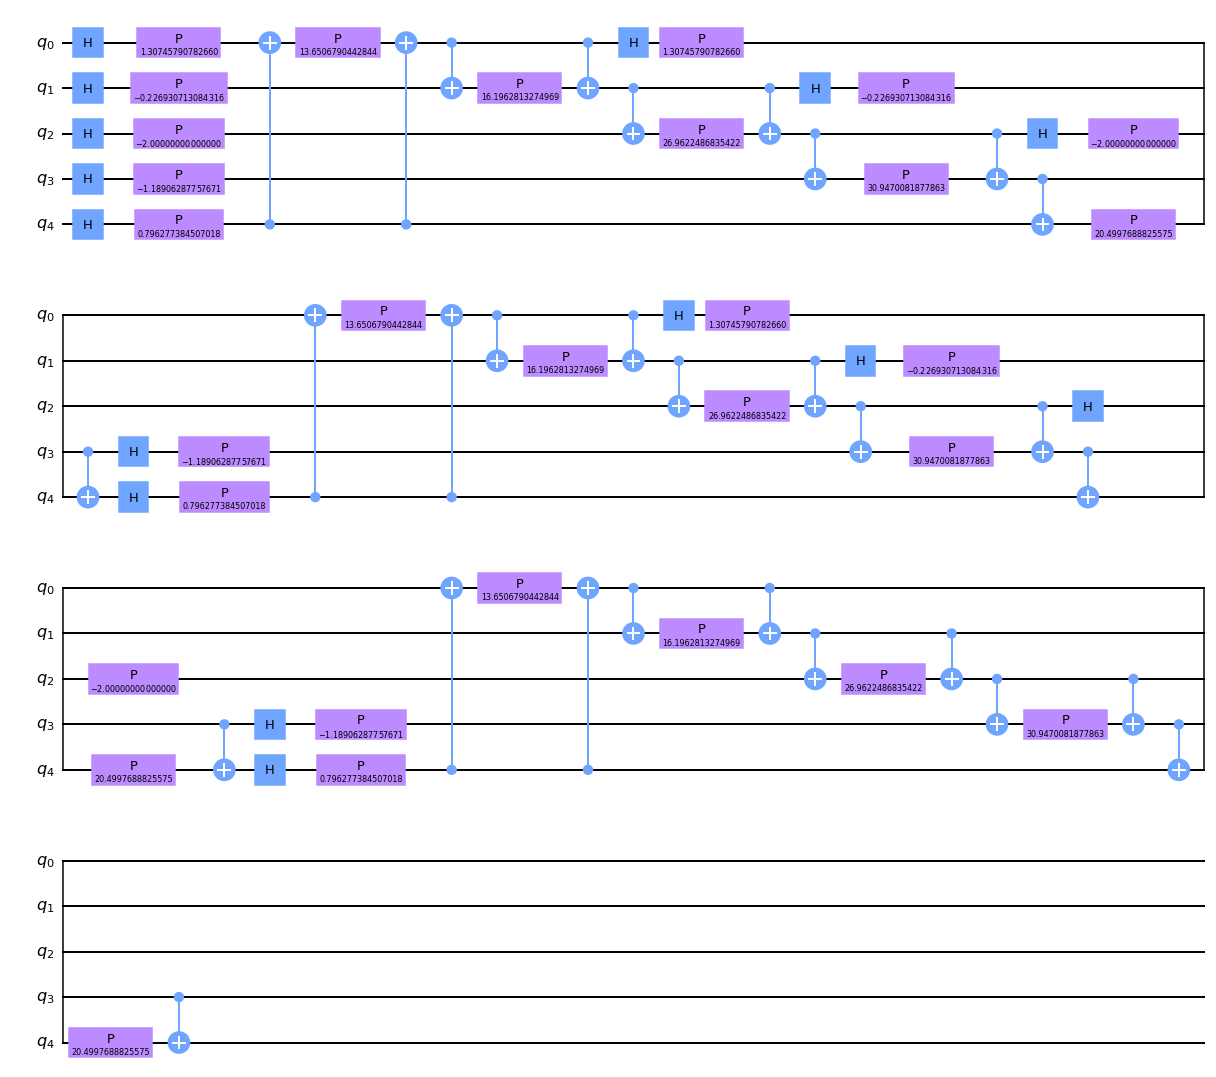

In [7]:
encode_circuit = ZZfeat_map.bind_parameters(sample_train[0])
encode_circuit.decompose().draw(output='mpl')